In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

1)Aggregare il numero dei pinguini per isola e specie e mostrare il risultato su un grafico a barre. Esportare l'aggregazione su un foglio xls.

In [27]:
pinguini = pd.read_csv("pinguini.csv")
pinguini

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
pinguini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [29]:
pinguini.dropna(inplace=True)
pinguini.info()
pinguini.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [30]:
aggregare = pinguini[["species", "island"]].groupby(["species", "island"]).size()
aggregare

species    island   
Adelie     Biscoe        44
           Dream         55
           Torgersen     47
Chinstrap  Dream         68
Gentoo     Biscoe       120
dtype: int64

In [31]:
aggregare.to_excel("aggregazione.xls")

<ipython-input-31-d92c1d87e679>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  aggregare.to_excel("aggregazione.xls")


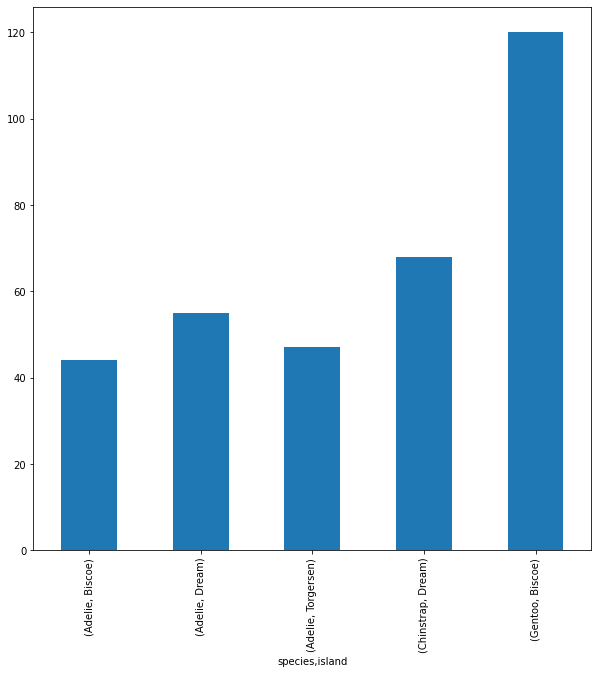

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
aggregare.plot.bar(ax = ax)
plt.show()

2) Iscriviti a Kaggle e scarica il dataset: https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types Carica pokemon.csv all'interno di un dataframe. Per ogni tipo di pokemon (colonna Type1) selezionane uno a caso e mostra la sua immagine all'interno del notebook. Crea un dataframe che contenga nome, Type1, Type2 e path del file .png per tutti i pokemon selezionati.

In [35]:
pokemon = pd.read_csv("pokemon.csv")
pokemon

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [36]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    809 non-null    object
 1   Type1   809 non-null    object
 2   Type2   405 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB


In [72]:
tipi_pokemon = pokemon["Type1"].unique()
tipi_pokemon

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

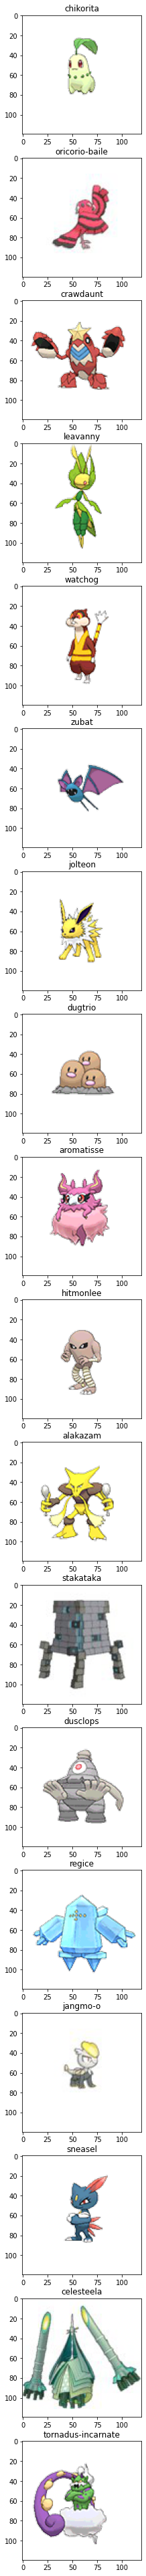

In [110]:
fig, axs = plt.subplots(nrows=len(tipi_pokemon),figsize=(10,70))

new_dataframe = {"Name":[], "Type1":[], "Type2":[], "Path":[]}

for i, tipo in enumerate(tipi_pokemon):
    nome = np.random.choice(pokemon[pokemon["Type1"]==tipo]["Name"].values)
    
    estensione = "png"
    try:imm = plt.imread(f"./images/{nome}.png")
    except:
        imm = plt.imread(f"./images/{nome}.jpg")
        estensione = "jpg"
        
        
    axs[i].imshow(imm)
    axs[i].set_title(nome)
    
    new_dataframe["Name"].append(nome)
    new_dataframe["Type1"].append(tipo)
    new_dataframe["Type2"].append(pokemon[(pokemon["Name"] == nome) & (pokemon["Type1"]==tipo)]["Type2"].values[0])
    new_dataframe["Path"].append(f"./images/{nome}.{estensione}")
    
    
    
plt.show()
    

In [111]:
new_dataframe

{'Name': ['chikorita',
  'oricorio-baile',
  'crawdaunt',
  'leavanny',
  'watchog',
  'zubat',
  'jolteon',
  'dugtrio',
  'aromatisse',
  'hitmonlee',
  'alakazam',
  'stakataka',
  'dusclops',
  'regice',
  'jangmo-o',
  'sneasel',
  'celesteela',
  'tornadus-incarnate'],
 'Type1': ['Grass',
  'Fire',
  'Water',
  'Bug',
  'Normal',
  'Poison',
  'Electric',
  'Ground',
  'Fairy',
  'Fighting',
  'Psychic',
  'Rock',
  'Ghost',
  'Ice',
  'Dragon',
  'Dark',
  'Steel',
  'Flying'],
 'Type2': [nan,
  'Flying',
  'Dark',
  'Grass',
  nan,
  'Flying',
  nan,
  nan,
  nan,
  nan,
  nan,
  'Steel',
  nan,
  nan,
  nan,
  'Ice',
  'Flying',
  nan],
 'Path': ['./images/chikorita.png',
  './images/oricorio-baile.jpg',
  './images/crawdaunt.png',
  './images/leavanny.png',
  './images/watchog.png',
  './images/zubat.png',
  './images/jolteon.png',
  './images/dugtrio.png',
  './images/aromatisse.png',
  './images/hitmonlee.png',
  './images/alakazam.png',
  './images/stakataka.jpg',
  './ima

In [112]:
pokemon_new = pd.DataFrame(new_dataframe)
pokemon_new

,Name,Type1,Type2,Path
0,chikorita,Grass,NaN,./images/chikorita.png
1,oricorio-baile,Fire,Flying,./images/oricorio-baile.jpg
2,crawdaunt,Water,Dark,./images/crawdaunt.png
3,leavanny,Bug,Grass,./images/leavanny.png
4,watchog,Normal,NaN,./images/watchog.png
5,zubat,Poison,Flying,./images/zubat.png
6,jolteon,Electric,NaN,./images/jolteon.png
7,dugtrio,Ground,NaN,./images/dugtrio.png
8,aromatisse,Fairy,NaN,./images/aromatisse.png
9,hitmonlee,Fighting,NaN,./images/hitmonlee.png
